<a href="https://colab.research.google.com/github/javier-jaime/Route-Recommender/blob/main/3PL__EDA_2021_MDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA and Feature Engineering

## Data Preparation

Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np

from google.colab import drive
from google.colab import files

# from sklearn.cluster import KMeans # Uncomment if required

In [ ]:
# Mount Google Drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read dataset from excel in Google Drive to Pandas Data Frame
data = pd.read_excel('drive/MyDrive/Colab Data/Hopewell 3PL Orig Data Dec 2021_Data set_MDD.xlsx', sheet_name='RawData')
print(data.shape)
data.set_index('Lean ID', inplace=True)

(25692, 29)


In [ ]:
data.head()

,Tender Date,First Pick Calculated Date,First Pick Location City,Last Drop Calculated Date,Last Drop Location Name,Last Drop Location Reference Number,Last Drop Location City,Last Drop State/Province,Total Distance (km),Weight (kg),...,Last Drop Original Plan Date Start,Last Drop Appt Start Date,Fiscal Period - Primary Date,Load Group,Shipper Load Number,Pieces,Density (pcf),First Pick Location Reference Number,Volume (cu ft),PRO Number
Lean ID,,,,,,,,,,,,,,,,,,,,,
103473910.0,12/31/2019 10:35,01/04/2020 00:44,BOLTON,01/13/2020 08:04,COSTCO LANGLEY DEPOT 076,10273118,LANGLEY,BC,4319.479296,18722.434543,...,01/13/2020 00:00,01/13/2020 07:30,1.0,ZA12-CUSTOMER,10160893,34.0,101.1788,0607,407.95,414488
103513165.0,01/02/2020 08:28,01/04/2020 01:01,BOLTON,01/09/2020 05:00,COSTCO DEPOT AIRDRIE 1034,10273117,AIRDRIE,AB,3406.981248,18129.126612,...,01/13/2020 00:00,01/13/2020 05:00,1.0,ZA12-CUSTOMER,10160952,33.0,69.1247,0607,578.20,4037416
103612501.0,01/03/2020 14:38,01/04/2020 01:38,BOLTON,01/09/2020 19:54,DOLLARAMA LP,10272755,MONT-ROYAL,QC,564.879744,2822.397062,...,01/06/2020 00:00,01/09/2020 20:00,1.0,ZA12-CUSTOMER,10161187,840.0,20.9760,0607,296.64,1000930055
103593735.0,01/03/2020 12:04,01/04/2020 01:38,BOLTON,01/07/2020 07:57,METRO - MCMAHON DIST PHARM INC,10394088,POINTE-AUX-TREMBLES,QC,584.191872,323.683537,...,01/06/2020 00:00,01/07/2020 08:00,1.0,ZA12-CUSTOMER,10161059,89.0,12.9393,0607,55.15,1000929883
103593457.0,01/03/2020 14:23,01/04/2020 01:38,BOLTON,01/09/2020 19:54,DOLLARAMA LP,10272755,MONT-ROYAL,QC,564.879744,7152.811954,...,01/06/2020 00:00,01/09/2020 20:00,1.0,ZA12-CUSTOMER,10161056,1830.0,14.7066,0607,1072.26,1000930030


In [ ]:
# Drop no necessary columns
data.drop(columns=['Last Drop Location Reference Number','Total Distance (km)','Fiscal Period - Primary Date','Load Group', 'Shipper Load Number', 'First Pick Location Reference Number','First Pick Appt Start Date','Last Drop Appt Start Date','Last Drop Arrival Date','First Pick Arrival Date','Pieces','PRO Number'], inplace=True)

In [ ]:
# Empty/NA cells
data.isnull().any()

Tender Date                           False
First Pick Calculated Date            False
First Pick Location City              False
Last Drop Calculated Date             False
Last Drop Location Name               False
Last Drop Location City               False
Last Drop State/Province              False
Weight (kg)                           False
Number of Shipments                   False
Pallets                               False
Equipment Description                 False
Temperature Class                     False
Transportation Mode                   False
Last Drop Original Plan Date Start    False
Density (pcf)                         False
Volume (cu ft)                        False
dtype: bool

In [ ]:
# Drop rows with Empty/NA cells uncomment if required
# data = data.dropna(axis=0)
# print(data.shape)
# data.isnull().any()

In [ ]:
data.dtypes

Tender Date                            object
First Pick Calculated Date             object
First Pick Location City               object
Last Drop Calculated Date              object
Last Drop Location Name                object
Last Drop Location City                object
Last Drop State/Province               object
Weight (kg)                           float64
Number of Shipments                   float64
Pallets                               float64
Equipment Description                  object
Temperature Class                      object
Transportation Mode                    object
Last Drop Original Plan Date Start     object
Density (pcf)                         float64
Volume (cu ft)                        float64
dtype: object

In [ ]:
data.describe(include=[object]).transpose()

,count,unique,top,freq
Tender Date,25692,13046,08/21/2020 12:24,14
First Pick Calculated Date,25692,14219,11/19/2020 00:00,29
First Pick Location City,25692,2,BOLTON,25691
Last Drop Calculated Date,25692,19085,11/19/2020 00:00,25
Last Drop Location Name,25692,364,WALMART LOGISTICS 6081,988
Last Drop Location City,25692,194,MISSISSAUGA,2166
Last Drop State/Province,25692,17,ON,10450
Equipment Description,25692,17,53 DRY-TL,5174
Temperature Class,25692,3,DRY,13170
Transportation Mode,25692,3,LTL,13284


In [ ]:
data.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
Weight (kg),25692.0,8419.58,7671.98,1.1,1445.35,6527.08,15062.55,82358.36
Number of Shipments,25692.0,1.36,0.96,1.0,1.00,1.00,1.00,14.00
Pallets,25692.0,20.15,17.50,0.0,3.83,17.00,35.27,196.14
Density (pcf),25692.0,19.49,11.29,0.0,15.63,19.74,22.58,599.03
Volume (cu ft),25692.0,985.84,865.74,0.0,188.88,855.54,1682.02,17688.06


In [ ]:
# Convert timestamps columns to date-time format
data.iloc[:,[0,1,3,13]] = data.iloc[:, [0,1,3,13]].apply(pd.to_datetime)

count    25692.000000
mean      8419.582023
std       7671.982607
min          1.102230
25%       1445.350637
50%       6527.081238
75%      15062.547153
max      82358.363835
Name: Weight (kg), dtype: float64


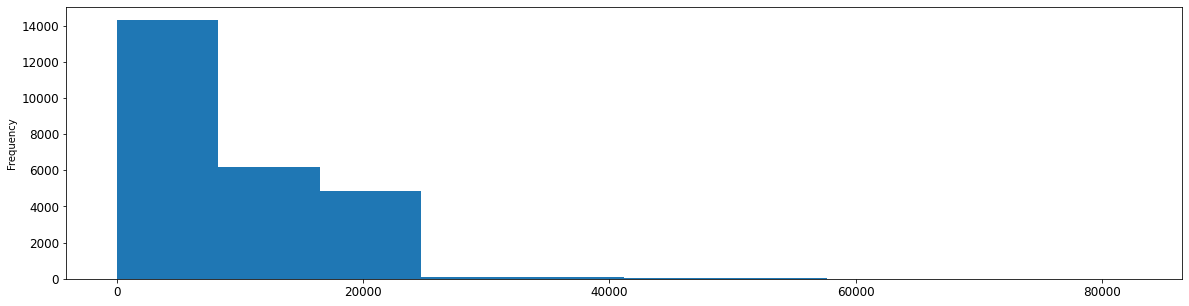

In [ ]:
# Weight Distribution is OK
print(data['Weight (kg)'].describe())
data['Weight (kg)'].plot.hist(figsize = [20, 5], fontsize = 12)

count                         25692
mean      4 days 18:10:44.588977113
std      27 days 12:49:04.814243418
min            -4379 days +20:14:00
25%                 2 days 07:51:30
50%                 4 days 07:18:00
75%                 7 days 12:11:00
max                53 days 10:13:00
Name: Total_Duration, dtype: object


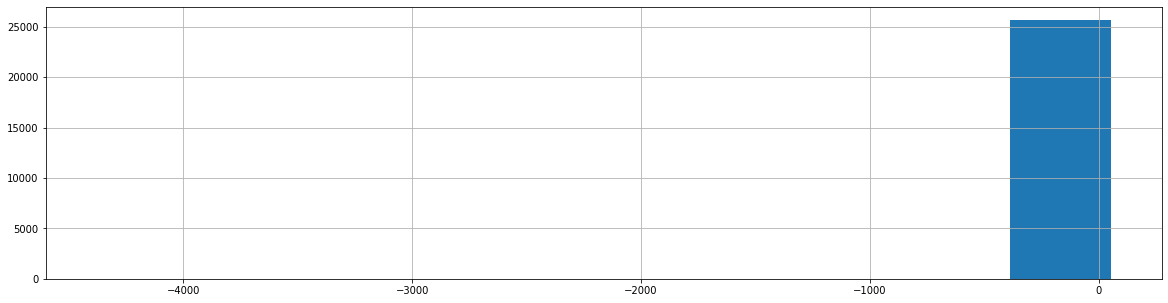

In [ ]:
# Total Duration between Tender Date (PO) and Required Delivery Date (RDD) is not OK
data['Total_Duration'] = data['Last Drop Original Plan Date Start'] - data['Tender Date']
print(data['Total_Duration'].describe())
data['Total_Duration'].dt.days.hist(figsize = [20, 5])

In [ ]:
data[data['Total_Duration']<'-4000 days']

,Tender Date,First Pick Calculated Date,First Pick Location City,Last Drop Calculated Date,Last Drop Location Name,Last Drop Location City,Last Drop State/Province,Weight (kg),Number of Shipments,Pallets,Equipment Description,Temperature Class,Transportation Mode,Last Drop Original Plan Date Start,Density (pcf),Volume (cu ft),Total_Duration
Lean ID,,,,,,,,,,,,,,,,,
116428590.0,2020-10-22 11:46:00,2020-10-27 07:00:00,BOLTON,2020-10-27 07:44:00,LAKE CITY FOODS,MISSISSAUGA,ON,18119.501381,1.0,16.0,53 REEFER-TL,REFRIGERATED,TL,2008-10-27 08:00:00,41.3437,966.21,-4379 days +20:14:00


In [ ]:
# Correct minimum value
data['Last Drop Original Plan Date Start'] = data['Last Drop Original Plan Date Start'].replace(data['Last Drop Original Plan Date Start'].min(),'2020-10-27 08:00:00')
data['Total_Duration'] = data['Last Drop Original Plan Date Start'] - data['Tender Date']

count                        25692
mean     3 days 12:44:48.451658103
std      5 days 23:15:19.049194692
min            -363 days +18:03:00
25%                0 days 01:30:00
50%                1 days 22:00:00
75%                6 days 16:36:45
max              370 days 10:00:00
Name: Calculated Duration, dtype: object


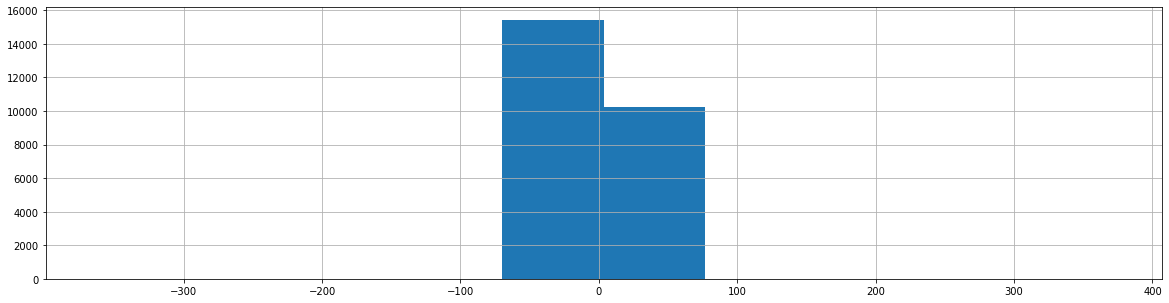

In [ ]:
# Calculated Duration between First Pick and Last Drop is not OK either
data['Calculated Duration'] = data['Last Drop Calculated Date'] - data['First Pick Calculated Date']
print(data['Calculated Duration'].describe())
data['Calculated Duration'].dt.days.hist(figsize = [20, 5])

In [ ]:
data[data['Calculated Duration']<'-359 days']

,Tender Date,First Pick Calculated Date,First Pick Location City,Last Drop Calculated Date,Last Drop Location Name,Last Drop Location City,Last Drop State/Province,Weight (kg),Number of Shipments,Pallets,Equipment Description,Temperature Class,Transportation Mode,Last Drop Original Plan Date Start,Density (pcf),Volume (cu ft),Total_Duration,Calculated Duration
Lean ID,,,,,,,,,,,,,,,,,,
93363776.0,2019-05-02 14:48:00,2020-05-03 12:01:00,BOLTON,2019-05-07 06:04:00,SOBEYS STELLARTON,STELLARTON,NS,6926.736966,1.0,17.06,53 REEFER-LTL,REFRIGERATED,LTL,2019-05-07,19.1597,797.03,4 days 09:12:00,-363 days +18:03:00
101586353.0,2019-11-13 12:06:00,2020-11-14 12:36:00,BOLTON,2019-11-21 01:00:00,COSTCO DEPOT AIRDRIE 1034,AIRDRIE,AB,17395.540695,1.0,36.00,40 DRY CONTAINER,DRY,IM,2019-11-21,21.0362,1823.08,7 days 11:54:00,-360 days +12:24:00


In [ ]:
# Easy Fix, change Tender Date by 1 year
# data['Last Drop Calculated Date'] = data['Last Drop Calculated Date'].replace(data['Last Drop Calculated Date'].min(),'2020-05-07 01:00:00')

In [ ]:
# Create a Dataframe from 3 Western Provinces
west_data = data[data['Last Drop State/Province'].isin(['BC', 'AB', 'SK','MB'])]

In [ ]:
# Unique Western Cities
print(len(west_data['Last Drop Location City'].unique()))
west_data['Last Drop Location City'].value_counts().to_frame()

57


,Last Drop Location City
ROCKY VIEW COUNTY,1786
CALGARY,1627
WINNIPEG,737
EDMONTON,618
LANGLEY,584
AIRDRIE,525
REGINA,525
DELTA,418
VANCOUVER,263
SURREY,246


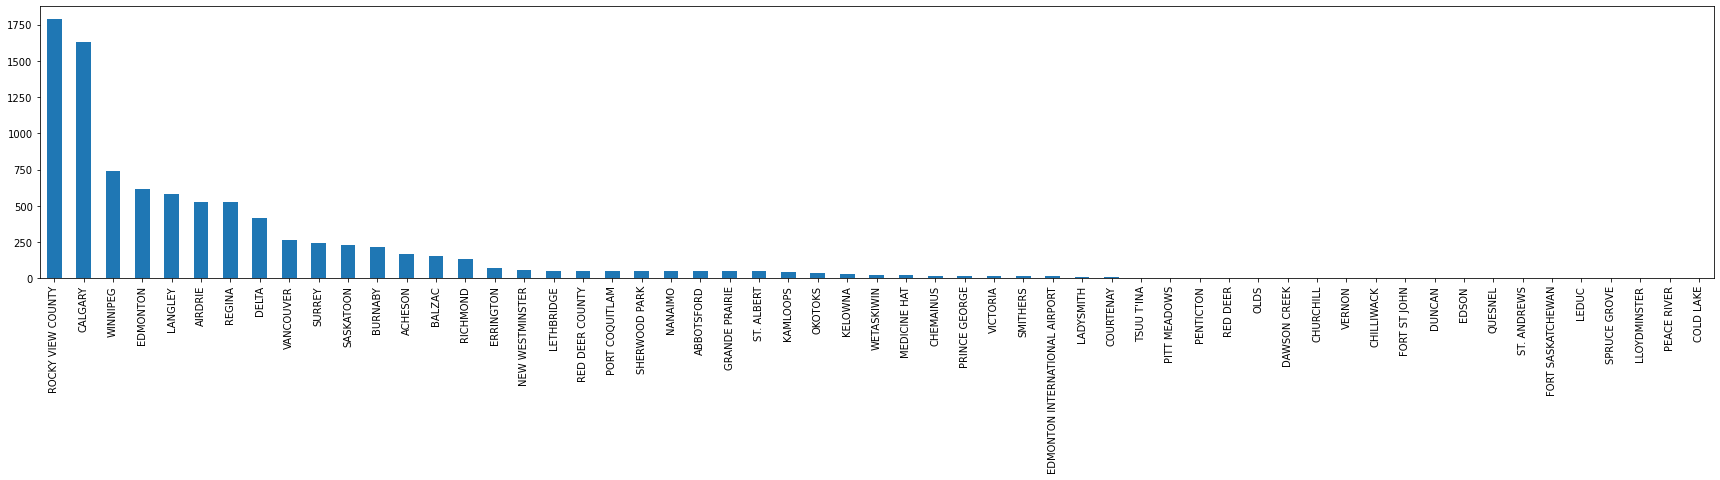

In [ ]:
west_data['Last Drop Location City'].value_counts().plot.bar(figsize = [30, 5], fontsize = 10)

In [ ]:
west_data[['Last Drop Location City', 'Last Drop State/Province', 'Total_Duration']].groupby(by=['Last Drop State/Province','Last Drop Location City']).mean()

Total_Duration
Last Drop State/Province Last Drop Location City                                  
AB                       ACHESON                         9 days 03:05:59.277108433
                         AIRDRIE                         9 days 03:26:55.428571428
                         BALZAC                          8 days 05:23:17.254901960
                         CALGARY                         7 days 17:56:07.818070067
                         COLD LAKE                                 7 days 11:14:00
                         EDMONTON                        8 days 12:43:09.805825242
                         EDMONTON INTERNATIONAL AIRPORT  8 days 19:39:25.714285714
                         EDSON                                     7 days 11:17:00
                         FORT SASKATCHEWAN                         7 days 11:11:00
                         GRANDE PRAIRIE                            8 days 12:32:10
                         LEDUC                                     7 days 11:10:00
                         LETHBRIDGE                      8 days 13:56:19.245283018
                         LLOYDMINSTER                              7 days 11:15:00
                         MEDICINE HAT                    8 days 10:16:54.285714285
                         OKOTOKS                                   8 days 13:17:27
                         OLDS                                      7 days 11:12:00
                         PEACE RIVER                               7 days 11:12:00
                         RED DEER                                  7 days 11:22:00
                         RED DEER COUNTY                 8 days 13:56:57.692307692
                         ROCKY VIEW COUNTY               6 days 18:05:46.461366181
                         SHERWOOD PARK                   8 days 14:00:01.153846153
                         SPRUCE GROVE                              7 days 11:14:00
                         ST. ALBERT                      8 days 13:09:39.574468085
                         TSUU T'INA                                7 days 15:31:12
                         WETASKIWIN                      8 days 12:22:40.909090909
BC                       ABBOTSFORD                     10 days 06:28:06.122448979
                         BURNABY                         9 days 22:40:57.488372093
                         CHEMAINUS                                10 days 10:26:00
                         CHILLIWACK                                8 days 10:37:00
                         COURTENAY                                10 days 14:36:00
                         DAWSON CREEK                              9 days 11:08:00
                         DELTA                           9 days 12:04:38.468899521
                         DUNCAN                                    9 days 11:05:00
                         ERRINGTON                      10 days 16:27:43.561643835
                         FORT ST JOHN                              9 days 11:01:00
                         KAMLOOPS                       10 days 04:21:13.043478260
                         KELOWNA                        10 days 03:41:03.636363636
                         LADYSMITH                                10 days 17:12:15
                         LANGLEY                         9 days 00:43:28.561643835
                         NANAIMO                        11 days 01:58:15.918367347
                         NEW WESTMINSTER                 9 days 10:00:07.241379310
                         PENTICTON                                 8 days 09:27:00
                         PITT MEADOWS                              9 days 17:52:15
                         PORT COQUITLAM                 10 days 03:58:53.076923076
                         PRINCE GEORGE                   9 days 15:49:42.352941176
                         QUESNEL                                   8 days 10:37:00
                         RICHMOND                        9 days 22:36:03.582089552
 

Rename Colums

In [ ]:
# data.rename(columns={'Old Name':'New Name', '':'', inplace=True)

In [ ]:
# Transportation Modes Counts
west_data['Transportation Mode'].value_counts().to_frame().transpose()

,LTL,IM,TL
Transportation Mode,5485,1836,993


In [ ]:
# Transportation Equipment Usage
west_data[['Transportation Mode','Temperature Class', 'Equipment Description']].groupby(by=['Transportation Mode','Temperature Class','Equipment Description']).count()

Empty DataFrame
Columns: []
Index: [(IM, DRY, 40 DRY CONTAINER), (IM, DRY, 53 DRY-IM), (IM, HEAT, 53 HEATED-IM), (IM, REFRIGERATED, 53 REEFER-IM), (LTL, DRY, 53 DRY - LTL IM), (LTL, DRY, 53 DRY-LTL), (LTL, DRY, 53 REEFER - LTL IM), (LTL, HEAT, 53 HEATED - LTL IM), (LTL, HEAT, 53 HEATED-LTL), (LTL, REFRIGERATED, 53 REEFER - LTL IM), (LTL, REFRIGERATED, 53 REEFER-LTL), (TL, DRY, 53 DRY-TL), (TL, HEAT, 53 HEATED-TL), (TL, REFRIGERATED, 53 REEFER-TL)]

count    8314.000000
mean       16.187267
std        15.609793
min         0.010000
25%         1.550000
50%        10.330000
75%        32.000000
max        53.940000
Name: Pallets, dtype: float64


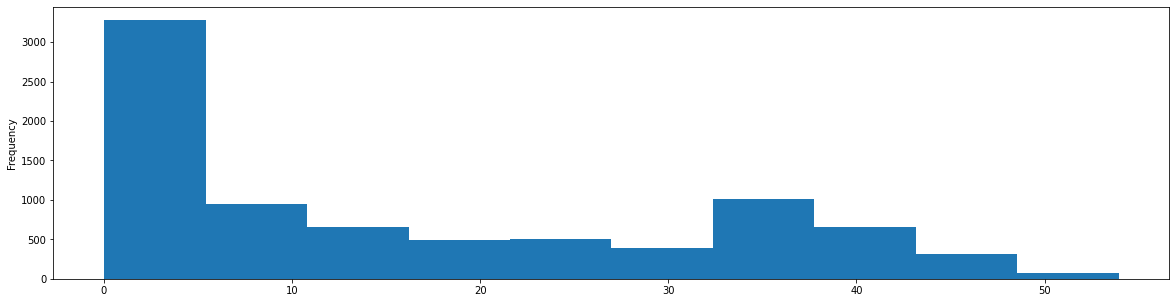

In [ ]:
# Distribution of Pallets is OK
print(west_data['Pallets'].describe())
west_data['Pallets'].plot.hist(figsize = [20, 5])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


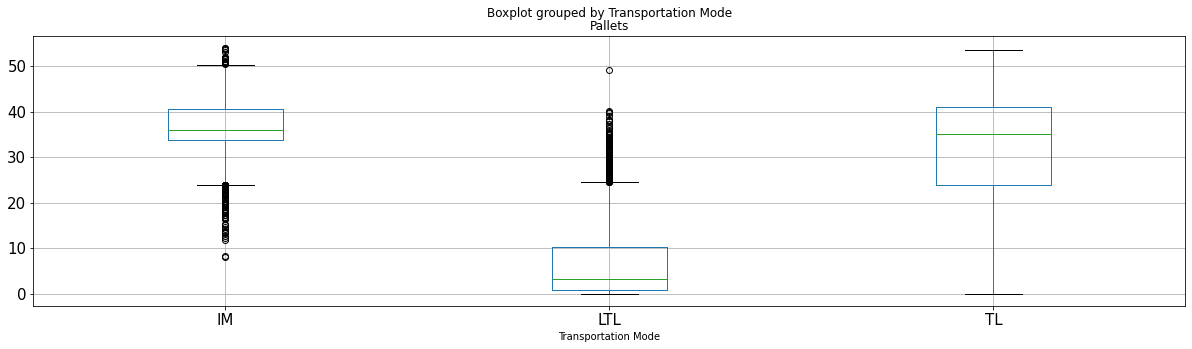

In [ ]:
# Pallets by Transportation Mode
west_data.boxplot('Pallets','Transportation Mode', figsize = [20, 5], fontsize = 15)

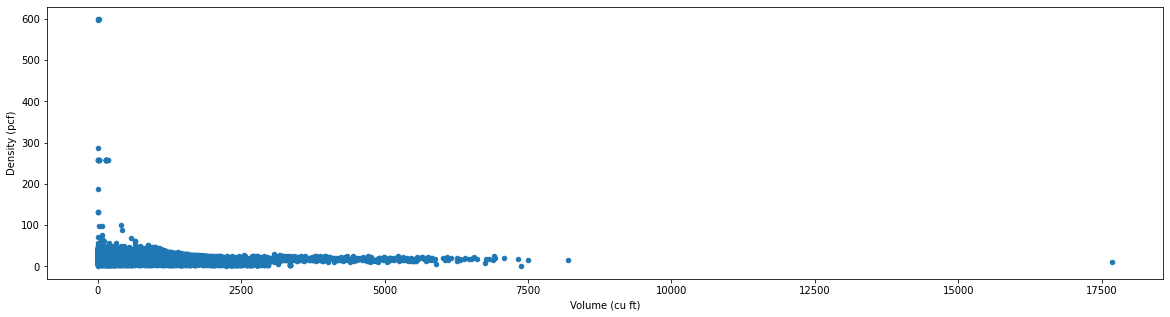

In [ ]:
data.plot.scatter('Volume (cu ft)','Density (pcf)', figsize = [20, 5])

count    8314.000000
mean       19.652020
std        12.256337
min         2.866200
25%        15.701075
50%        19.704850
75%        22.691500
max       598.672200
Name: Density (pcf), dtype: float64


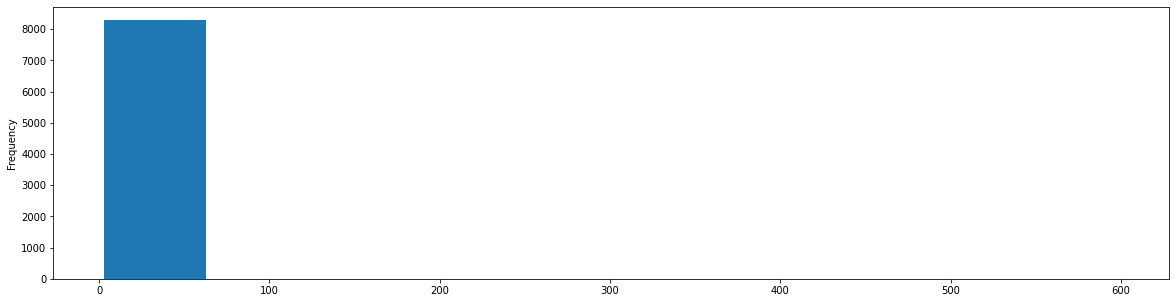

In [ ]:
# Density Distribution doesn't look right
print(west_data['Density (pcf)'].describe())
west_data['Density (pcf)'].plot.hist(figsize = [20, 5])

In [ ]:
# Why so heavy?
west_data[west_data['Density (pcf)']>500]

,Tender Date,First Pick Calculated Date,First Pick Location City,Last Drop Calculated Date,Last Drop Location Name,Last Drop Location City,Last Drop State/Province,Weight (kg),Number of Shipments,Pallets,Equipment Description,Temperature Class,Transportation Mode,Last Drop Original Plan Date Start,Density (pcf),Volume (cu ft),Total_Duration,Calculated Duration
Lean ID,,,,,,,,,,,,,,,,,,
108596856.0,2020-04-30 11:34:00,2020-05-01 10:40:00,BOLTON,2020-05-08 10:00:00,WALMART LOGISTICS 6063,CALGARY,AB,2128.976753,2.0,7.4,53 REEFER-LTL,REFRIGERATED,LTL,2020-05-08,598.6722,7.84,7 days 12:26:00,6 days 23:20:00


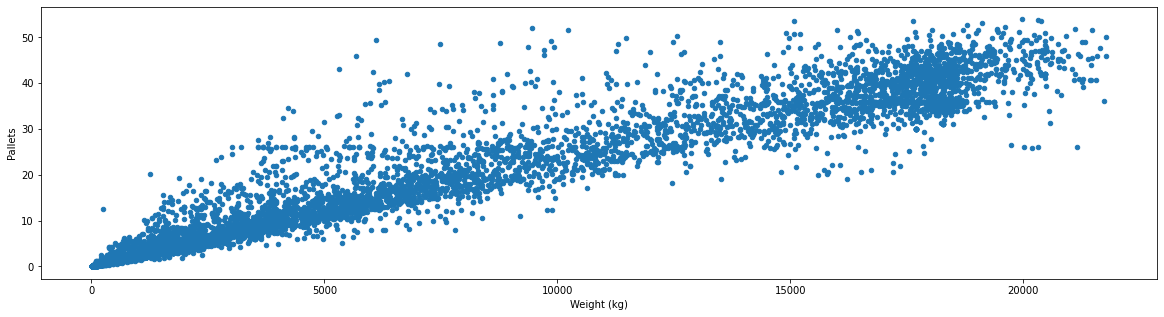

In [ ]:
# Correlation between Weight and Pallets is OK
west_data.plot.scatter('Weight (kg)','Pallets', figsize = [20, 5])

In [ ]:
# Save the clean dataset to an Excel Spreadsheet
west_data.to_excel('3PL_MDD_Clean_West_Data.xlsx', sheet_name='3PL')
!cp 3PL_MDD_Clean_West_Data.xlsx "/content/drive/My Drive/Colab Data/"

## Geo Location Data for OSM

In [ ]:
# Install necessary Libraries, uncomment if required
!pip install geopandas
!pip install folium
!pip install osmnx
!pip install pygeos
import folium # map rendering library
from folium import plugins
import geopandas as gpd
from geopy.geocoders import Nominatim
from shapely.geometry import LineString, Point
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

     |████████████████████████████████| 1.0 MB 5.3 MB/s 
     |████████████████████████████████| 6.3 MB 35.8 MB/s 
     |████████████████████████████████| 16.7 MB 35.6 MB/s 
     |████████████████████████████████| 95 kB 2.5 MB/s 
     |████████████████████████████████| 11.2 MB 32.9 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 1.0 MB 37.1 MB/s 
     |████████████████████████████████| 930 kB 37.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires reque

     |████████████████████████████████| 2.1 MB 5.2 MB/s 


/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [ ]:
# Convert an address/city into latitude and longitude values / Input Origin
address = input('Enter Adress/City, Province/State and/or Country: ')

geolocator = Nominatim(user_agent="Canada_explore")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))

Enter Adress/City, Province/State and/or Country: bolton, on
The geograpical coordinate of bolton, on are 43.879548, -79.73826.


In [ ]:
# Create a new Dataframe for Unique Cities
cities = west_data[['Last Drop Location City','Last Drop State/Province']].groupby(['Last Drop Location City','Last Drop State/Province']).count().reset_index()

In [ ]:
# Geo locate Cities
destinations = gpd.GeoDataFrame(columns = ['name', 'geometry'], crs = 4326, geometry = 'geometry')
geolocator = Nominatim(user_agent="Canada_explorer")
Lat = []
Lon = []

for i in range(len(cities)):
  location = geolocator.geocode(cities['Last Drop Location City'][i]+', '+cities['Last Drop State/Province'][i])
  print('The geograpical coordinate of {} {} is {}, {}.'.format(i, cities['Last Drop Location City'][i], location.latitude, location.longitude))
  destinations.at[i, 'geometry'] = Point(location.longitude, location.latitude)
  destinations.at[i, 'name'] = cities['Last Drop Location City'][i]
  Lat.append(location.latitude)
  Lon.append(location.longitude)

cities['Latitude'] = Lat
cities['Longitude'] = Lon

The geograpical coordinate of 0 ABBOTSFORD is 49.0521162, -122.329479.
The geograpical coordinate of 1 ACHESON is 53.5459141, -113.7715761.
The geograpical coordinate of 2 AIRDRIE is 51.28597, -114.01062.
The geograpical coordinate of 3 BALZAC is 51.2156111, -114.0045579.
The geograpical coordinate of 4 BURNABY is 49.2433804, -122.9725459.
The geograpical coordinate of 5 CALGARY is 51.0460954, -114.065465.
The geograpical coordinate of 6 CHEMAINUS is 48.922499, -123.718414.
The geograpical coordinate of 7 CHILLIWACK is 49.157677, -121.9514307.
The geograpical coordinate of 8 COLD LAKE is 54.46046, -110.192871.
The geograpical coordinate of 9 COURTENAY is 49.6894061, -124.9954959.
The geograpical coordinate of 10 DAWSON CREEK is 55.7605306, -120.2364453.
The geograpical coordinate of 11 DELTA is 49.0846258, -123.0579384.
The geograpical coordinate of 12 DUNCAN is 48.7786872, -123.7080446.
The geograpical coordinate of 13 EDMONTON is 53.535411, -113.507996.
The geograpical coordinate of 

In [ ]:
cities

,Last Drop Location City,Last Drop State/Province,Latitude,Longitude
0,ABBOTSFORD,BC,49.052116,-122.329479
1,ACHESON,AB,53.545914,-113.771576
2,AIRDRIE,AB,51.285970,-114.010620
3,BALZAC,AB,51.215611,-114.004558
4,BURNABY,BC,49.243380,-122.972546
5,CALGARY,AB,51.046095,-114.065465
6,CHEMAINUS,BC,48.922499,-123.718414
7,CHILLIWACK,BC,49.157677,-121.951431
8,COLD LAKE,AB,54.460460,-110.192871
9,COURTENAY,BC,49.689406,-124.995496


## Save the clean dataset to an Excel Spreadsheet

In [ ]:
# Save the clean dataset to an Excel Spreadsheet
cities.to_excel('Western_Cities_Data.xlsx', sheet_name='Cities')
!cp Western_Cities_Data.xlsx "/content/drive/My Drive/Colab Data/"

In [ ]:
# Create the Origin Point
origin = gpd.GeoDataFrame(columns = ['name', 'geometry'], crs = 4326, geometry = 'geometry')
origin.at[0, 'geometry'] = Point(-79.73826, 43.879548)
origin.at[0, 'name'] = 'Bolton'
origin

,name,geometry
0,Bolton,POINT (-79.73826 43.87955)


         name                     geometry
0  ABBOTSFORD  POINT (-122.32948 49.05212)
1     ACHESON  POINT (-113.77158 53.54591)
2     AIRDRIE  POINT (-114.01062 51.28597)
3      BALZAC  POINT (-114.00456 51.21561)
4     BURNABY  POINT (-122.97255 49.24338)


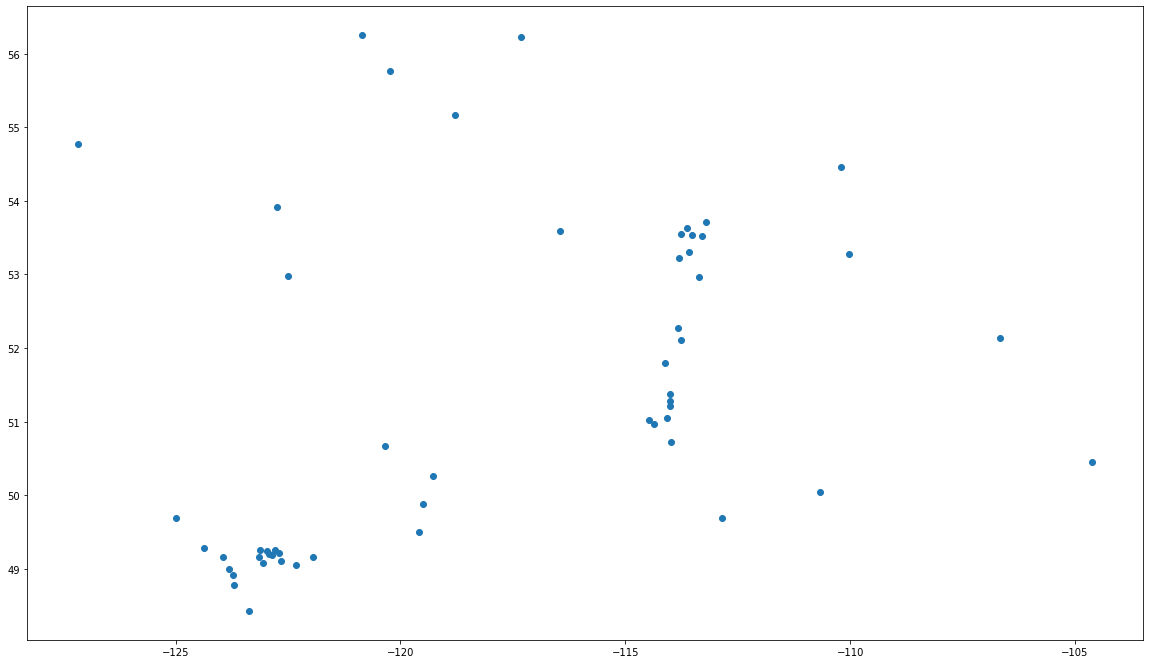

In [ ]:
# Destination created above (Print & Plot)
print(destinations.head())
destinations.plot(figsize=(20,50));

In [ ]:
# create a Canada map using latitude and longitude values from destinations
map_canada = folium.Map(location=[54, -110], zoom_start=5)

# add markers to map
for lat, lon, City in zip(cities['Latitude'], cities['Longitude'],cities['Last Drop Location City']):
    label = '{}'.format(City)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=1,
        popup=label,
        color='blue',
        fill=False,
        fill_opacity = 0.2,
        parse_html=False).add_to(map_canada)  
 
map_canada

### OpenStreetMaps Helper Functions

In [ ]:
# Function that gives back the shortest path (It can have many origins and destinations)

def shortest_path(origin, destination, network = 'drive'):
    '''origin and destination <geodataframe> crs 4326, network <str> drive, bike, walk
    return shortest path <GeoDataFrame>
    '''
    
    # creating a frame for fetching OSM data
    combined = origin.append(destination)
    
    convex = combined.unary_union.convex_hull
    
    graph_extent = convex.buffer(0.02)
    
    # fetching graph
    graph = ox.graph_from_polygon(graph_extent, network_type= network)
    
    # Reproject the graph
    graph_proj = ox.project_graph(graph)
    
    # Get the GeoDataFrame
    edges = ox.graph_to_gdfs(graph_proj, nodes=False)
    
    # Get CRS info UTM
    CRS = edges.crs
    
    # Reproject all data
    origin_proj = origin.to_crs(crs=CRS)
    destination_proj = destination.to_crs(crs=CRS)
    
    # routes of shortest path
    routes = gpd.GeoDataFrame()
    
    # Get nodes from the graph
    nodes = ox.graph_to_gdfs(graph_proj, edges=False)
    
    # Iterate over origins and destinations
    for oidx, orig in origin_proj.iterrows():
        
        # Find closest node from the graph --> point = (latitude, longitude)
        closest_origin_node = ox.get_nearest_node(G=graph_proj, point=(orig.geometry.y, orig.geometry.x), method='euclidean')
        
        # Iterate over targets
        for tidx, target in destination_proj.iterrows():
            
            # Find closest node from the graph --> point = (latitude, longitude)
            closest_target_node = ox.get_nearest_node(graph_proj, point=(target.geometry.y, target.geometry.x), method='euclidean')

            # Check if origin and target nodes are the same --> if they are --> skip
            if closest_origin_node == closest_target_node:
                print("Same origin and destination node. Skipping ..")
                continue
            
            # Find the shortest path between the points
            route = nx.shortest_path(graph_proj, 
                                     source=closest_origin_node, 
                                     target=closest_target_node, weight='length')
        
            # Extract the nodes of the route
            route_nodes = nodes.loc[route]
        
            # Create a LineString out of the route
            path = LineString(list(route_nodes.geometry.values))
        
            # Append the result into the GeoDataFrame
            routes = routes.append([[path]], ignore_index=True)

    # Add a column name
    routes.columns = ['geometry']        

    # Set geometry
    routes = routes.set_geometry('geometry')
    
    # Set coordinate reference system
    routes.crs = nodes.crs
    
    return routes

In [ ]:
routes = shortest_path(origin, destinations.head(3))

KeyboardInterrupt: ignored

In [ ]:
routes.plot(figsize=(10,20))

In [ ]:
routes

In [ ]:
routes.crs

### Cluster Locations by Geographical Region

In [ ]:
# one hot encoding
# onehotregion = pd.get_dummies(data[['Type']], prefix="", prefix_sep="")
# add back estimated Start Coordinates
# onehotregion['Latitude'] = data['Latitude']
# onehotregion['Longitude'] = data['Longitude']
# print(onehotregion.shape)
# onehotregion.head()

In [ ]:
# set number of clusters
# kclusters = 10

# run k-means clustering
# kmeans = KMeans(init = "k-means++", n_clusters=kclusters, random_state=123).fit(onehotregion)

# check how many cluster labels were generated for each row in the dataframe
# len(kmeans.labels_)

In [ ]:
# add Region labels
# onehotregion.insert(0, 'Region', kmeans.labels_)
# onehotregion.head()

### Feature Engineering

> Indented block

